In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load Dataset
df = pd.read_csv("/content/synthetic_category_data_12000.csv")
X = df[['x1', 'x2']].values
y = df['label'].values

In [3]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X,      # features
    y,      # labels
    test_size=0.3,
    random_state=42
)

In [4]:
# Build Simple Neural Network
model = Sequential([
    Dense(8, activation='relu', input_shape=(2,)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')   # Binary output
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=30, verbose=0, validation_data=(X_test, y_test))

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


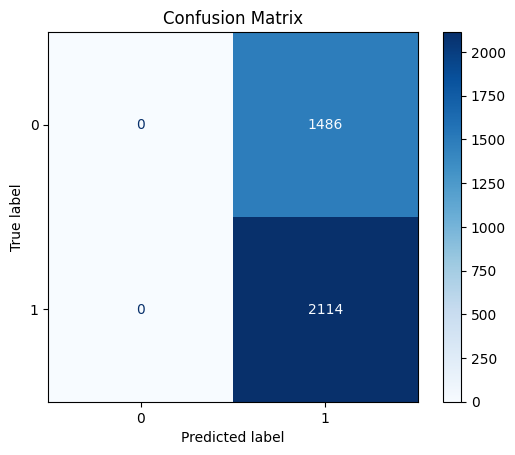

In [6]:
# Evaluate + Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [7]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1486
           1       0.59      1.00      0.74      2114

    accuracy                           0.59      3600
   macro avg       0.29      0.50      0.37      3600
weighted avg       0.34      0.59      0.43      3600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
# Simulate Overfitting (Train too long)
overfit_model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
overfit_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_overfit = overfit_model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))


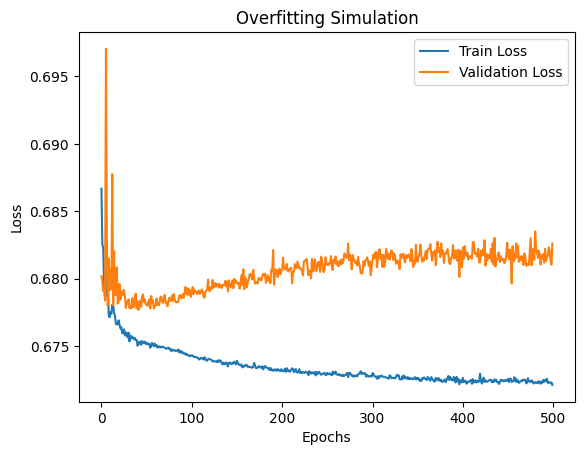

In [10]:
# Plot training vs validation loss
plt.plot(history_overfit.history['loss'], label='Train Loss')
plt.plot(history_overfit.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Overfitting Simulation")
plt.show()
